In [2]:
import pickle, random, os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


## User-defined Parameters

In [3]:

dir = ""  
dataFile='../../data/processed/data_matrix/data_48h_mean.pkl'
figFile='../../figures/src/Figure3.png'
figOptFile='../../figures/src/Figure3_opt.png'

dataFile_reps={'../../data/processed/data_matrix/data_48h_rep1.pkl',
               '../../data/processed/data_matrix/data_48h_rep2.pkl',
               '../../data/processed/data_matrix/data_48h_rep3.pkl',
               '../../data/processed/data_matrix/data_48h_rep4.pkl'}

fileDataPKL=os.path.join(dir, dataFile)

## Auxiliary Functions

In [4]:
def save_obj(obj, name ):
    with open(name, 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name, 'rb') as f:
        return pickle.load(f)

## Data Processing Functions

In [5]:
def getODs(DATA, KEY):
    for i, thisDATA in enumerate(DATA):
        if thisDATA['KEY']==KEY:
            return thisDATA['ODs']
    return -1

def getSTDs(DATA, KEY):
    for i, thisDATA in enumerate(DATA):
        if thisDATA['KEY']==KEY:
            return thisDATA['STDs']
    return -1

def getMeanODs(DATA, KEY):
    ODs=getODs(DATA,KEY)
    return np.mean(ODs), np.std(ODs)
    
def getTreatmentODs(DATA, this_treatment):
    Freqs=[]
    ODs=[]
    
    for i in range(0,11):
        this_OD=getODs(DATA,'%s%s'%(this_treatment,i))
        
        for r, repOD in enumerate(this_OD):
            Freqs.append(i/10.)
            ODs.append(this_OD[r])
    return Freqs,ODs

def getTreatmentSTDs(DATA, this_treatment):
    Freqs=[]
    STDs=[]
    
    for i in range(0,11):
        this_STD=getSTDs(DATA,'%s%s'%(this_treatment,i))
        
        for r, repSTD in enumerate(this_STD):
            Freqs.append(i/10.)
            STDs.append(this_STD[r])
    return Freqs,STDs

In [6]:

DATA=load_obj(fileDataPKL)


<Figure size 864x864 with 0 Axes>

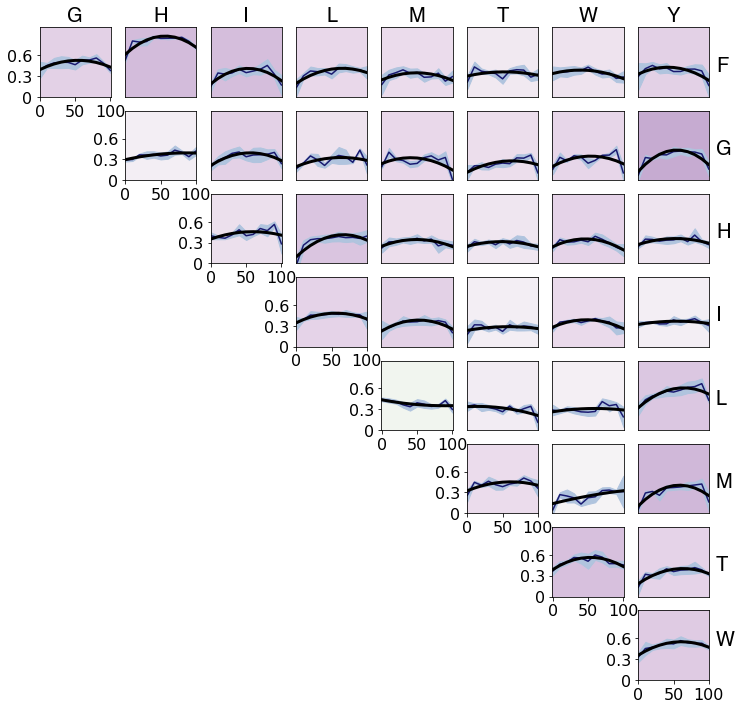

In [8]:
minOD=0.2
maxOD=1.
bgOD=0.078

plt.figure()

plt.rcParams["figure.figsize"] = [12,12]
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.facecolor']='white'

font = {'family': 'helvetica',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }

treatments=['FG', 'FH', 'FI', 'FL', 'FM', 'FT', 'FW', 'FY',  
            'GH', 'GI', 'GL', 'GM', 'GT', 'GW', 'GY',
            'HI', 'HL', 'HM', 'HT', 'HW', 'HY',
            'IL', 'IM', 'IT', 'IW', 'IY', 
            'LM', 'LT', 'LW', 'LY',
            'MT', 'MW', 'MY',
            'TW', 'TY',
            'WY'
           ]

f, ((axFG, axFH, axFI, axFL, axFM, axFT, axFW, axFY),
    (axGG, axGH, axGI, axGL, axGM, axGT, axGW, axGY),
    (axHG, axHH, axHI, axHL, axHM, axHT, axHW, axHY),
    (axIG, axIH, axII, axIL, axIM, axIT, axIW, axIY),
    (axLG, axLH, axLI, axLL, axLM, axLT, axLW, axLY),
    (axMG, axMH, axMI, axML, axMM, axMT, axMW, axMY),
    (axTG, axTH, axTI, axTL, axTM, axTT, axTW, axTY),
    (axWG, axWH, axWI, axWL, axWM, axWT, axWW, axWY)) = plt.subplots(8, 8)

ax=[axFG, axFH, axFI, axFL, axFM, axFT, axFW, axFY,
    axGG, axGH, axGI, axGL, axGM, axGT, axGW, axGY,
    axHG, axHH, axHI, axHL, axHM, axHT, axHW, axHY,
    axIG, axIH, axII, axIL, axIM, axIT, axIW, axIY,
    axLG, axLH, axLI, axLL, axLM, axLT, axLW, axLY,
    axMG, axMH, axMI, axML, axMM, axMT, axMW, axMY,
    axTG, axTH, axTI, axTL, axTM, axTT, axTW, axTY,
    axWG, axWH, axWI, axWL, axWM, axWT, axWW, axWY]

iax=['FG', 'FH', 'FI', 'FL', 'FM', 'FT', 'FW', 'FY',  
     'X', 'GH', 'GI', 'GL', 'GM', 'GT', 'GW', 'GY', 
     'X', 'X', 'HI', 'HL', 'HM', 'HT', 'HW', 'HY',
     'X', 'X', 'X', 'IL', 'IM', 'IT', 'IW', 'IY',
     'X', 'X', 'X', 'X', 'LM', 'LT', 'LW', 'LY',
     'X', 'X', 'X', 'X', 'X', 'MT', 'MW', 'MY',
     'X', 'X', 'X', 'X', 'X', 'X', 'TW', 'TY',
     'X', 'X', 'X', 'X', 'X', 'X', 'X', 'WY']



rgb = cm.get_cmap('PRGn_r', 201)
for k, treat in enumerate(treatments):
    Freqs,ODs=getTreatmentODs(DATA, treat) 
    Freqs,STDs=getTreatmentSTDs(DATA, treat) 
    
    ODs=[x - bgOD for x in ODs]
    Freqs=[100*x for x in Freqs]
    
    iplot=iax.index(treat)
    
    fit = np.polyfit(Freqs,ODs,2)
    fit_fn = np.poly1d(fit) 
    
    this_relDen=fit_fn(50)-0.5*(fit_fn(100)+fit_fn(0))
    
    this_color=rgb(0.5+this_relDen)
    ax[iplot].set_facecolor(this_color)
    ax[iplot].patch.set_alpha(0.9)
    
    ax[iplot].plot(Freqs, ODs,'-',color='midnightblue')
    
    std1=[x - y/2 for x, y in zip(ODs, STDs)]
    std2=[x + y/2 for x, y in zip(ODs, STDs)]
    ax[iplot].fill_between(Freqs, std1, std2, color='lightsteelblue')
    
    ax[iplot].plot(Freqs,fit_fn(Freqs),'k-',linewidth=3)
    

for c in range(0,8):
    for r in range(0,8):
        if c<r:
            ax[r*8+c].set_axis_off()
        else:
            ax[r*8+c].set_axis_on()
            ax[r*8+c].set_ylim([minOD,maxOD])
            ax[r*8+c].set_xlim([-.5,100.5])
            ax[r*8+c].yaxis.set_ticks([])
            ax[r*8+c].xaxis.set_ticks([])
            
lbl_rows=['F','G','H','I','L','M','T','W']
lbl_cols=['G','H','I','L','M','T','W','Y']    
for ci, c in enumerate(range(0,8)):
    ax[c].set_title(lbl_cols[ci], fontdict=font, fontsize=20)
    
    ax[c*8+c].xaxis.set_ticks(np.arange(0,101,50))
    ax[c*8+c].yaxis.set_ticks([0, 0.3, 0.6])
    ax[c*8+c].set_xticklabels(['0', '50','100'],fontsize=16)
    ax[c*8+c].set_yticklabels(['0', '0.3','0.6'],fontsize=16)
         

for r in [0,1,2,3,4,5,6,7]:
    ax[(r+1)*8-1].text(110, 0.5, lbl_rows[r], fontdict=font, fontsize=20)
    
plt.show()


In [9]:
import scipy.stats
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2

FG 	alpha= 0.3927258741258741  R2= 0.620344562847154
FH 	alpha= 0.6914223776223778  R2= 0.7593324544561708
FI 	alpha= 0.3510034965034966  R2= 0.6664944903808119
FL 	alpha= 0.3576125874125874  R2= 0.7492820687498967
FM 	alpha= 0.39667412587412604  R2= 0.40274021313500885
FT 	alpha= 0.440083916083916  R2= 0.10053368396124368
FW 	alpha= 0.4694020979020981  R2= 0.7500532509818927
FY 	alpha= 0.46357202797202784  R2= 0.5856658861541444
GH 	alpha= 0.29575874125874113  R2= 0.573003990900443
GI 	alpha= 0.36992167832167827  R2= 0.7081182678163962
GL 	alpha= 0.3571902097902098  R2= 0.2855358507451795
GM 	alpha= 0.3914783216783218  R2= 0.29072222219489324
GT 	alpha= 0.2914818181818183  R2= 0.4139319382233852
GW 	alpha= 0.35985944055944064  R2= 0.2542366340912806
GY 	alpha= 0.30094475524475506  R2= 0.7963470531463474
HI 	alpha= 0.3515265734265735  R2= 0.19048739240063253
HL 	alpha= 0.27717062937062925  R2= 0.7489651733507711
HM 	alpha= 0.3992335664335665  R2= 0.6814246786542055
HT 	alpha= 0.3978244

<Figure size 864x864 with 0 Axes>

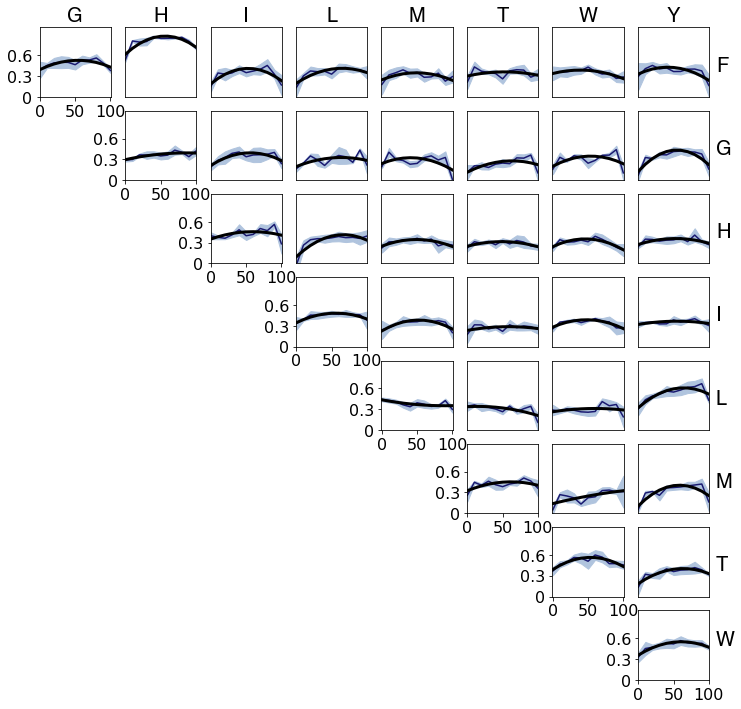

In [10]:
minOD=0.2
maxOD=1.
bgOD=0.078

plt.figure()

plt.rcParams["figure.figsize"] = [12,12]
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.facecolor']='white'

font = {'family': 'helvetica',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }

treatments=['FG', 'FH', 'FI', 'FL', 'FM', 'FT', 'FW', 'FY',  
            'GH', 'GI', 'GL', 'GM', 'GT', 'GW', 'GY',
            'HI', 'HL', 'HM', 'HT', 'HW', 'HY',
            'IL', 'IM', 'IT', 'IW', 'IY', 
            'LM', 'LT', 'LW', 'LY',
            'MT', 'MW', 'MY',
            'TW', 'TY',
            'WY'
           ]

f, ((axFG, axFH, axFI, axFL, axFM, axFT, axFW, axFY),
    (axGG, axGH, axGI, axGL, axGM, axGT, axGW, axGY),
    (axHG, axHH, axHI, axHL, axHM, axHT, axHW, axHY),
    (axIG, axIH, axII, axIL, axIM, axIT, axIW, axIY),
    (axLG, axLH, axLI, axLL, axLM, axLT, axLW, axLY),
    (axMG, axMH, axMI, axML, axMM, axMT, axMW, axMY),
    (axTG, axTH, axTI, axTL, axTM, axTT, axTW, axTY),
    (axWG, axWH, axWI, axWL, axWM, axWT, axWW, axWY)) = plt.subplots(8, 8)

ax=[axFG, axFH, axFI, axFL, axFM, axFT, axFW, axFY,
    axGG, axGH, axGI, axGL, axGM, axGT, axGW, axGY,
    axHG, axHH, axHI, axHL, axHM, axHT, axHW, axHY,
    axIG, axIH, axII, axIL, axIM, axIT, axIW, axIY,
    axLG, axLH, axLI, axLL, axLM, axLT, axLW, axLY,
    axMG, axMH, axMI, axML, axMM, axMT, axMW, axMY,
    axTG, axTH, axTI, axTL, axTM, axTT, axTW, axTY,
    axWG, axWH, axWI, axWL, axWM, axWT, axWW, axWY]

iax=['FG', 'FH', 'FI', 'FL', 'FM', 'FT', 'FW', 'FY',  
     'X', 'GH', 'GI', 'GL', 'GM', 'GT', 'GW', 'GY', 
     'X', 'X', 'HI', 'HL', 'HM', 'HT', 'HW', 'HY',
     'X', 'X', 'X', 'IL', 'IM', 'IT', 'IW', 'IY',
     'X', 'X', 'X', 'X', 'LM', 'LT', 'LW', 'LY',
     'X', 'X', 'X', 'X', 'X', 'MT', 'MW', 'MY',
     'X', 'X', 'X', 'X', 'X', 'X', 'TW', 'TY',
     'X', 'X', 'X', 'X', 'X', 'X', 'X', 'WY']


for k, treat in enumerate(treatments):
    Freqs,ODs=getTreatmentODs(DATA, treat) 
    Freqs,STDs=getTreatmentSTDs(DATA, treat) 
    
    ODs=[x - bgOD for x in ODs]
    Freqs=[100*x for x in Freqs]
    
    iplot=iax.index(treat)
    
    fit = np.polyfit(Freqs,ODs,2)
    fit_fn = np.poly1d(fit) 
    #ax[iplot].plot(Freqs,fit_fn(Freqs),'r-',Freqs, ODs,'.',color='grey')
    
    #print(fit_fn(Freqs))
    #print(ODs)
    r2=rsquared(ODs, fit_fn(Freqs))
    print(treat,"\talpha=",fit[-1]," R2=", r2)
    
    ax[iplot].plot(Freqs, ODs,'-',color='midnightblue')
    
    std1=[x - y/2 for x, y in zip(ODs, STDs)]
    std2=[x + y/2 for x, y in zip(ODs, STDs)]
    ax[iplot].fill_between(Freqs, std1, std2, color='lightsteelblue')
    
    ax[iplot].plot(Freqs,fit_fn(Freqs),'k-',linewidth=3)
    #print('%s:%s'%(treat,iplot))
    
    #ax[iplot].plot(Freqs, ODs,'.k')
    

for c in range(0,8):
    for r in range(0,8):
        if c<r:
            ax[r*8+c].set_axis_off()
        else:
            ax[r*8+c].set_axis_on()
            ax[r*8+c].set_ylim([minOD,maxOD])
            ax[r*8+c].set_xlim([-.5,100.5])
            ax[r*8+c].yaxis.set_ticks([])
            ax[r*8+c].xaxis.set_ticks([])
            
lbl_rows=['F','G','H','I','L','M','T','W']
lbl_cols=['G','H','I','L','M','T','W','Y']    
for ci, c in enumerate(range(0,8)):
    ax[c].set_title(lbl_cols[ci], fontdict=font, fontsize=20)
    
    ax[c*8+c].xaxis.set_ticks(np.arange(0,101,50))
    ax[c*8+c].yaxis.set_ticks([0, 0.3, 0.6])
    ax[c*8+c].set_xticklabels(['0', '50','100'],fontsize=16)
    ax[c*8+c].set_yticklabels(['0', '0.3','0.6'],fontsize=16)
         

for r in [0,1,2,3,4,5,6,7]:
    ax[(r+1)*8-1].text(110, 0.5, lbl_rows[r], fontdict=font, fontsize=20)
plt.show()


[15.  25.  27.5 30.  35.  37.5 37.5 40.  45.  45.  45.  50.  50.  52.5
 55.  57.5 57.5 60.  60.  60.  62.5 62.5 62.5 65.  67.5 67.5 70.  70.
 70.  70.  72.5 75.  75.  75.  80.  85. ]


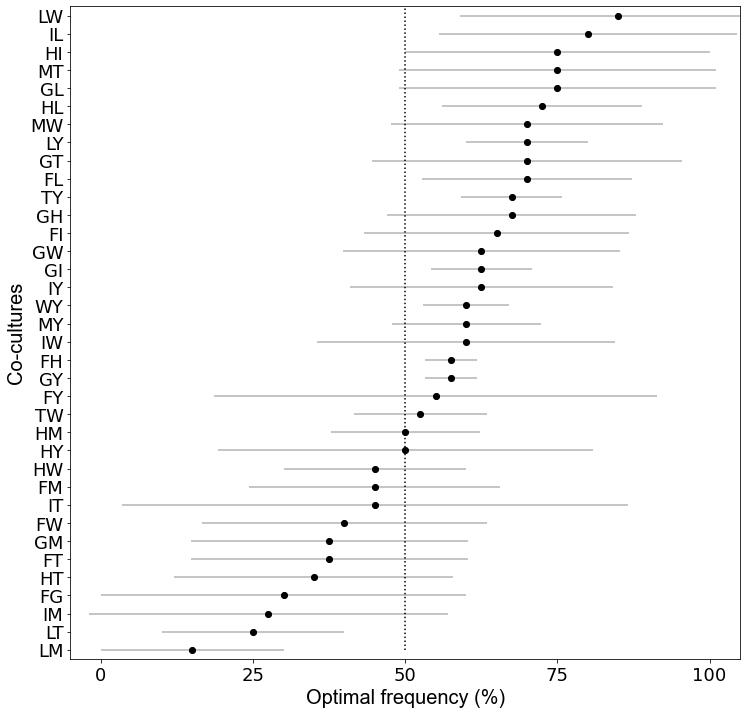

In [11]:
plt.figure()

plt.rcParams["figure.figsize"] = [5,10]
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.facecolor']='white'

font = {'family': 'arial',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

treatments=['FG', 'FH', 'FI', 'FL', 'FM', 'FT', 'FW', 'FY',  #FH missing
            'GH', 'GI', 'GL', 'GM', 'GT', 'GW', 'GY',
            'HI', 'HL', 'HM', 'HT', 'HW', 'HY',
            'IL', 'IM', 'IT', 'IW', 'IY', 
            'LM', 'LT', 'LW', 'LY', 
            'MT', 'MW', 'MY',
            'TW', 'TY',
            'WY'
           ]
maxFreq=[]
lbl=[]
for dataFile_rep in dataFile_reps:
    fileDataPKL_rep=os.path.join(dir, dataFile_rep)
    DATA_rep=load_obj(fileDataPKL_rep)
    
    for k, treat in enumerate(treatments):
        Freqs,ODs=getTreatmentODs(DATA_rep, treat)
        #print(ODs)
        
        fit = np.polyfit(Freqs,ODs,2)
        fit_fn = np.poly1d(fit) 
        ODfit=fit_fn(Freqs)
        
        #ODfit = savitzky_golay(np.asarray(ODs), 11, 4)
        #print(ODfit)
        
        imax=np.argmax(ODfit)
        maxFreq.append(100*Freqs[imax])
        
        lbl.append(treat)

maxFreq=np.asarray(maxFreq)
lbl=np.asarray(lbl)

repFreqs=[]    
meanFreqs=[]
stdFreqs=[]
meanlbls=[]

for k, treat in enumerate(treatments):
    this_treats=[]
    for i, thislbl in enumerate(lbl):
            if thislbl==treat:  
                this_treats.append(i)
                
    repFreqs.append(maxFreq[this_treats])     

    
    meanFreqs.append(np.mean(maxFreq[this_treats]))
    stdFreqs.append(np.std(maxFreq[this_treats]))
    meanlbls.append(treat)

    
isort=(np.argsort(meanFreqs))
meanFreqs=np.asarray(meanFreqs)
meanlbls=np.asarray(meanlbls)
stdFreqs=np.asarray(stdFreqs)
    
lbl_treatments=np.asarray(treatments)
plt.plot([50, 50],[0, len(lbl_treatments)],':',color='black')
plt.errorbar(meanFreqs[isort], np.asarray(range(0,len(meanlbls))), xerr=stdFreqs[isort],color='black',fmt='o',alpha=0.3)    
plt.scatter(meanFreqs[isort],np.asarray(range(0,len(meanlbls))),color='black')

plt.ylabel('Co-cultures',fontdict=font, fontsize=20)
plt.xlabel('Optimal frequency (%)',fontdict=font, fontsize=20)
plt.yticks(np.arange(0,len(meanlbls),1),lbl_treatments[isort], fontsize=18)
plt.xticks([0, 25, 50, 75, 100], fontsize=18)

plt.xlim([-5,105])
plt.ylim([-.5,len(meanlbls)-0.5])
  
plt.show()